In [1]:
import pandas as pd

In [2]:
cols = ['Date', 'Destination']
parser = lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='coerce')
main_df = pd.read_csv('./searches.csv', sep='^', encoding='utf-8', usecols=cols, parse_dates=['Date'], date_parser=parser, chunksize=10000, index_col=0)

In [3]:
# DF that accumulates the counters for each city
gcount_MAD = None
gcount_BCN = None
gcount_AGP = None
# Process dataframe in chunks to avoid out of memory error
for l, searches_df in enumerate(main_df):

    # We consider Madrid has 2 airports
    grouped_MAD = searches_df[(searches_df.Destination == 'MAD') | (searches_df.Destination == 'TOJ')]
    grouped_BCN = searches_df[searches_df.Destination == 'BCN']
    grouped_AGP = searches_df[searches_df.Destination == 'AGP']   

    count_MAD = grouped_MAD.groupby(pd.TimeGrouper("M")).count()
    if gcount_MAD is None:
        gcount_MAD = count_MAD
    else:
        gcount_MAD = gcount_MAD.add(count_MAD, fill_value=0)
            
    count_BCN = grouped_BCN.groupby(pd.TimeGrouper("M")).count()
    if gcount_BCN is None:
        gcount_BCN = count_BCN
    else:
        gcount_BCN = gcount_BCN.add(count_BCN, fill_value=0)
            
    count_AGP = grouped_AGP.groupby(pd.TimeGrouper("M")).count()
    if gcount_AGP is None:
        gcount_AGP = count_AGP
    else:
        gcount_AGP = gcount_AGP.add(count_AGP, fill_value=0)
    


In [4]:
gcount_MAD.rename(columns={'Destination': 'MAD'}, inplace=True)
gcount_BCN.rename(columns={'Destination': 'BCN'}, inplace=True)
gcount_AGP.rename(columns={'Destination': 'AGP'}, inplace=True)

In [5]:
gcount_all = pd.concat([gcount_MAD, gcount_BCN, gcount_AGP], axis=1)

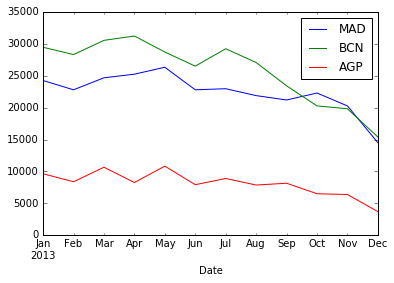

In [6]:
%matplotlib inline
gcount_all.plot()